# GMSL Analysis and Prediction 

## Water Dataset (https://www.kaggle.com/mathsian/water-temperature)

Podaci u ovom skupu podataka predstavljaju uzorke vode sakupljene iz okeana između 1959. i 2020. godine. Uzećemo u obzir 
podatke prikupljane na dubinama do 200m (Photic).

Podaci koji su od interesa za naš rad su:
* T_degC - temperatura vode izražena u celzijusima 
* O2ml_L - zasićenost vode kiseonikom

In [1463]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [1464]:
df = pd.read_csv('original_datasets/water.csv', delimiter=',')

In [1465]:
df.head()

,Sta_ID,Date,Quarter,Lat_Deg,Depthm,Zone,T_degC,PO4uM,SiO3uM,NO2uM,NO3uM,Salnty,O2ml_L
0,130.0 050.0,08/16/1959,3,25,0,Photic,25.38,0.36,1.0,0.0,0.9,34.150,4.72
1,130.0 050.0,08/16/1959,3,25,1,Photic,25.38,0.36,1.0,0.0,0.9,34.150,4.72
2,130.0 050.0,08/16/1959,3,25,10,Photic,25.35,0.41,1.0,0.0,0.8,34.180,4.14
3,130.0 050.0,08/16/1959,3,25,20,Photic,23.50,0.42,1.0,0.0,1.2,34.146,4.26
4,130.0 050.0,08/16/1959,3,25,30,Photic,21.45,0.43,1.0,0.0,1.5,34.117,4.57


In [1466]:
df.columns

Index(['Sta_ID', 'Date', 'Quarter', 'Lat_Deg', 'Depthm', 'Zone', 'T_degC',
       'PO4uM', 'SiO3uM', 'NO2uM', 'NO3uM', 'Salnty', 'O2ml_L'],
      dtype='object')

#### Uklanjanje kolona koje nisu od interesa. Kolone 'Depthm' i 'Zone' se ostavljaju radi daljih razmatranja.

* Depthm - dubina na kojoj je izvršeno merenje
* Zone - zona u kojoj je izvršeno merenje (Photic/Disphotic)

In [1467]:
df.drop(['Sta_ID', 'Quarter', 'Lat_Deg', 'PO4uM', 'SiO3uM',
         'NO2uM', 'NO3uM', 'Salnty'], axis = 1, inplace = True)

In [1468]:
df.rename(columns={'T_degC':'WaterTemp', 'O2ml_L':'O2ml'}, inplace = True)

In [1469]:
df.describe()

,Depthm,WaterTemp,O2ml
count,337792.000000,337792.000000,337792.000000
mean,170.392887,11.185802,3.728877
std,214.807837,3.820133,1.991083
min,0.000000,1.480000,-0.010000
25%,40.000000,8.200000,1.990000
50%,103.000000,10.450000,3.930000
75%,250.000000,14.170000,5.680000
max,5351.000000,30.020000,11.130000


In [1470]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337792 entries, 0 to 337791
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date       337792 non-null  object 
 1   Depthm     337792 non-null  int64  
 2   Zone       337792 non-null  object 
 3   WaterTemp  337792 non-null  float64
 4   O2ml       337792 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 12.9+ MB


#### Konvertovanje datuma iz stringa u datetime

In [1471]:
df['Date'] = pd.to_datetime(df['Date'])

#### Uzimaju se u obzir podaci koji su prikupljani da dubinama do 200m (Photic) nakon čega se ta kolona briše

In [1472]:
df = df[df['Zone'] == 'Photic']

In [1473]:
df['Zone'].values

array(['Photic', 'Photic', 'Photic', ..., 'Photic', 'Photic', 'Photic'],
      dtype=object)

In [1474]:
df.drop('Zone', axis = 1, inplace = True)

In [1475]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236431 entries, 0 to 337791
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       236431 non-null  datetime64[ns]
 1   Depthm     236431 non-null  int64         
 2   WaterTemp  236431 non-null  float64       
 3   O2ml       236431 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 9.0 MB


In [1476]:
df.head()

,Date,Depthm,WaterTemp,O2ml
0,1959-08-16,0,25.38,4.72
1,1959-08-16,1,25.38,4.72
2,1959-08-16,10,25.35,4.14
3,1959-08-16,20,23.50,4.26
4,1959-08-16,30,21.45,4.57


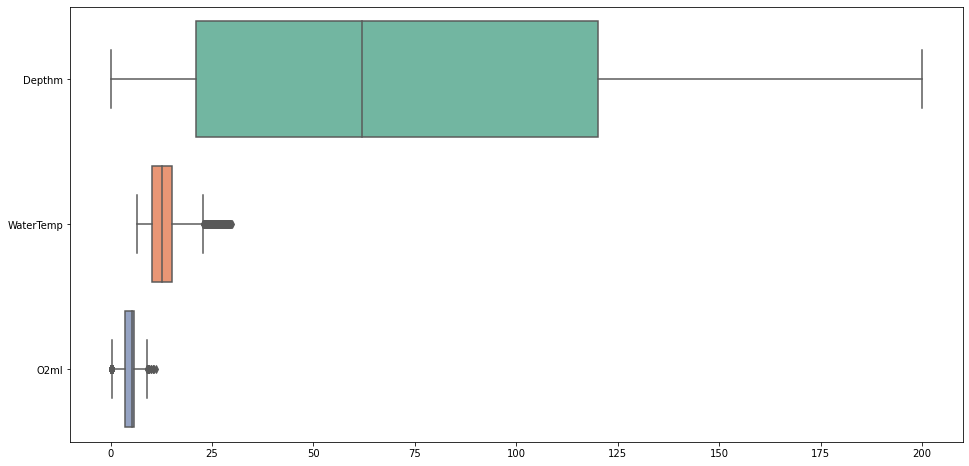

In [1477]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sb.boxplot(data=df, orient="h", palette="Set2")

In [1478]:
df.shape

(236431, 4)

In [1479]:
df.nunique()

Date          3080
Depthm         201
WaterTemp    11518
O2ml          5376
dtype: int64

#### Pošto skup podataka ima 236431 redova, a rezultat nunique vraća da postoji 3080 različitih Date zaključujemo da postoje duplikati. 

#### Izdvajanjem duplikata, može se primetiti da oni predstavljaju merenja u istom danu na različitim dubinama.

In [1480]:
duplicate_dates = df.duplicated(subset=['Date'], keep=False)
df = df.loc[duplicate_dates.values]
df.head(20)

,Date,Depthm,WaterTemp,O2ml
0,1959-08-16,0,25.38,4.72
1,1959-08-16,1,25.38,4.72
2,1959-08-16,10,25.35,4.14
3,1959-08-16,20,23.50,4.26
4,1959-08-16,30,21.45,4.57
5,1959-08-16,34,20.58,4.74
6,1959-08-16,44,19.94,4.69
7,1959-08-16,50,19.30,5.04
8,1959-08-16,58,18.36,5.39
9,1959-08-16,73,16.83,4.21


#### Grupisanjem po datumu i korišćenjem median metode, dobija se podatak o temperaturi vode i koncentraciji O2 za određeni dan.

In [1481]:
df = df.groupby('Date')[['WaterTemp', 'O2ml']].median().reset_index()

#### Nakon grupisanja izbačeni su duplikati i obrisane suvišne kolone

In [1482]:
df.sort_values('Date').head(5)

,Date,WaterTemp,O2ml
0,1959-08-16,18.360,4.210
1,1959-08-18,17.140,4.655
2,1959-08-19,16.640,5.120
3,1959-08-23,15.905,4.130
4,1959-08-26,16.950,3.765


#### Uzimamo u obzir datume od 1969. do 2013. godine

In [1483]:
df = df[(df['Date'] >= '1969-01') & (df['Date'] <= '2014-02')]

In [1484]:
df.head().append(df.tail())

,Date,WaterTemp,O2ml
5,1969-01-08,11.5950,5.2050
6,1969-01-10,15.6300,5.6750
7,1969-01-11,13.4500,5.8500
8,1969-01-12,11.8000,4.9050
9,1969-01-15,13.0450,5.0250
2706,2013-11-25,16.1600,5.9560
2707,2014-01-29,13.8515,5.2720
2708,2014-01-30,12.3200,5.0765
2709,2014-01-31,13.6280,5.6750
2710,2014-02-01,14.9620,5.6040


#### Dodajemo datume koji nedostaju

In [1485]:
df.set_index('Date', inplace = True)

In [1486]:
idx = pd.date_range(start='1969-01', end='2014-02' , freq='M')
df_missing = df.reindex(idx, fill_value=None)

df = df.append(df_missing)

In [1487]:
df.sort_index(inplace=True)

In [1488]:
df.reset_index(inplace = True)

In [1489]:
df.rename(columns={'index':'Date'}, inplace = True)

In [1490]:
df['Date'] = pd.to_datetime(df['Date'])

In [1491]:
df['Date'] = df['Date'].dt.strftime('%Y-%m')

#### Kako bi se dobili podaci za određeni mesec izvršiće se grupisanje po datumu nakon što se izbaci dan iz datuma

In [1492]:
df = df.groupby('Date')[['WaterTemp', 'O2ml']].median().reset_index()

In [1493]:
df.head().append(df.tail())

,Date,WaterTemp,O2ml
0,1969-01,13.2650,5.5950
1,1969-02,12.4350,5.6950
2,1969-03,15.5350,5.4900
3,1969-04,12.0700,5.3125
4,1969-05,12.1200,5.9450
537,2013-10,NaN,NaN
538,2013-11,12.4965,5.3810
539,2013-12,NaN,NaN
540,2014-01,13.6280,5.4735
541,2014-02,14.9620,5.6040


#### Vrednosti atributa sa nedostajućim vrednostima

<AxesSubplot:>

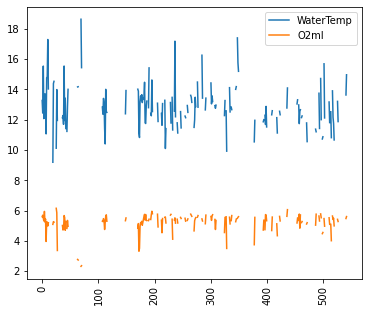

In [1494]:
df.plot(x_compat=True, rot=90, figsize=(6, 5))

#### Vršimo interpolaciju kako bi popunili nedostajuće vrednosti

In [1495]:
df = df.interpolate(method="polynomial", order=1, limit_direction='both')

#### Vrednosti atributa nakon interpolacije

<AxesSubplot:>

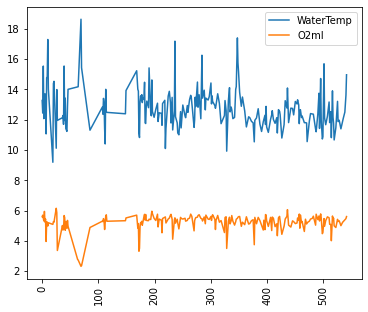

In [1496]:
df.plot(x_compat=True, rot=90, figsize=(6, 5))

In [1498]:
df.drop(df.tail(2).index,inplace=True)

In [1499]:
df.head().append(df.tail())

,Date,WaterTemp,O2ml
0,1969-01,13.265000,5.595000
1,1969-02,12.435000,5.695000
2,1969-03,15.535000,5.490000
3,1969-04,12.070000,5.312500
4,1969-05,12.120000,5.945000
535,2013-08,12.053062,5.263625
536,2013-09,12.200875,5.302750
537,2013-10,12.348688,5.341875
538,2013-11,12.496500,5.381000
539,2013-12,13.062250,5.427250


In [1500]:
df.to_csv('processed_datasets/WaterTemp_O2ml.csv', index = False)